# STA141B Group Project

# Race, School Ratings, Crime and Real Estate: What affects home price in California? 

Written by:

Jingqi Chen (998841054)

Yili Wang (999316533)

KaWoon Tam(913389384)

WeiZhuo Xiong(914443957)

## I. Background and Purpose

When it comes to home buying market, people usually need to consider many characteristics of the house, such as number of bedrooms and bathrooms, lot size, garage, backyard, etc. However, there are actually much more factors need to be thought about beyond the house itself. For example, public school ratings and crime situation. Accroding to a national study conducted in 2013, public school ratings in the district can affect the homes' values, which leads to an average premium of $50 a square foot. Besides, racial composition of the neighborhood also influence home buyers' decisions. For most of the time, school ratings and racial composition interact with each other and mutually pose impact on real estate price. From 2006 report of the National Fair Housing Alliance, "it is evident from the investigation that schools have become a proxy for the racial or ethnic composition of neighborhoods". 

Therefore, we conducted this project researching the relationship between public school rating and racial composition and their influences in home prices. Moreover, we examine the crime occurrence and house price. And in the end, use web scraping to predict the trend of the house price.  

## II. Data Sources

In terms of data searching, since we are undergraduates at UC Davis, we choose California real estate market as our sample. In order to achieve our research goal, we obtain data from the following sources:

1. [Median Home Value Per Square Foot from Zillow Data]( https://www.zillow.com/research/data/)
2. [Public School Ratings from California Department of Education](http://www.cde.ca.gov/ta/ac/ap/ )
3. [Crime Report from FBI Uniform Crime Reporting](https://ucr.fbi.gov/ )

## III. Raw Data Description

| Dataset | Source | Description | Parameter of Interest |
|---------------|-----------------|------------------|------------------|
|Home Price|Zillow Data|monthly median prices of cities in California|Median Home Value Per Sq Ft ($)|
|Public School Rating (API)|California Department of Education|API (Academic Performance Index) of California public schools in 2013|API score; Percentage of White student; Percentage of Asian student;  percent of immigrated student; Class size; Parents education level|
|Crime|FBI Uniform Crime Reporting|Crime Incidences in California by city in 2013|Different types of crime: Murder, Rape, Robbery, Aggravated assault, Property crime, Burglary, Larceny theft, Motor vehicle theft, Arson|

## IV.  Data Pre-processing

For our project, there are three main datasets, which are home price, public school average academic performance index(API) and crime. Since we only interested in the relationship between these datasets in California, and the dataset of 2013 public school academic information only incorporate those in California. Accordingly, by using merge method in pandas we can merge different dataset share same city name. After that, we will count the average home price in year 2013 for each city and use it to analyse.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as kde
from matplotlib.colors import Normalize
from matplotlib import cm
from scipy.stats import gaussian_kde

In [2]:
price = pd.read_csv("Zip_MedianValuePerSqft_AllHomes.csv")

In [3]:
school = pd.read_csv("CA_schools.csv")

/Users/chenjingqi/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (57,58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#merge price data and school
data=pd.merge(price,school,left_on='City',right_on='DNAME',how='inner')
data=data.groupby('City').mean()

In [5]:
#create dataframe have API in 2013 and home price in 2013
y=np.mean(data.iloc[:,208:220],axis=1)
APIPRICE=pd.DataFrame([data['API13'],y]).dropna(axis=1)

## V. Academic Performance Index (API) and House Price

### Correlation Plot of Academic Performance Index (API) and House Price

In [6]:
import scipy
from scipy import stats
from sklearn import datasets, linear_model
from scipy.stats import gaussian_kde

Academic Performance Index is a parameter express the education level for a school, the school which have higher Academic Performance Index(API) means the students in this school have better grade. Firstly, what we want to find out is whether API and house price are correlated. Since the original scatter plot between price and API share log form, we use the log value of both price and API to display the consequence, which shows that these two parameters seems to be positive related. Then the question is, if API have positive relation with price, what parameters will affect API?

For the following plots, we use different scatter plots to find the relationship between API and other parameters and use size of points to express home price (larger points means more expensive home price).

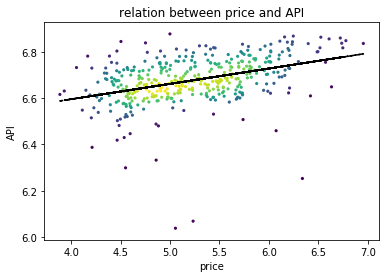

slope:0.0662402253738
intercept:6.33053647228
r_value:0.399533235218
p_value:1.00668779685e-16
std_err:0.00762798326365


In [7]:
#relation between price and api

y=np.log(APIPRICE.iloc[0,:])
x=np.log(APIPRICE.iloc[1,:])
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=10, edgecolor='')
plt.plot( x, fit_fn(x), '--k')
plt.title('relation between price and API')
plt.xlabel('price')
plt.ylabel('API')
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)
plt.show()
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
print('slope:{}\nintercept:{}\nr_value:{}\np_value:{}\nstd_err:{}'.format(slope, intercept, r_value, p_value, std_err))

### API v.s Student Type (migrate/ not migrate)

The first thing we can thought out which might correlated with API is the percentage of different students. Since most of us are international students so we want to know whether percentage of international students might affect API, and the answer seems not, the distribution between API and migrate student have a normal distribution which is pretty natural, so we can't deduce correlation from that.

In [8]:
y=np.sum(data[['PCT_AS','PCT_WH']],axis=1)
y1=data['PCT_HI']
ASIANWHITE=pd.DataFrame([data['API13'],y]).dropna(axis=1)
MIGRAGE=pd.DataFrame([data['API13'],data['P_MIGED']]).dropna(axis=1)
ASWHLA=pd.DataFrame([data['API13'],y1]).dropna(axis=1)

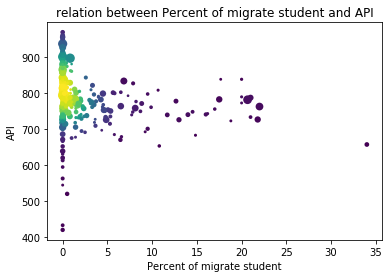

In [9]:
#Percent of migrate student and API
y = MIGRAGE.iloc[0,:]
x = MIGRAGE.iloc[1,:]
size=np.mean(data.iloc[:,208:220],axis=1)
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=size/10, edgecolor='')
plt.title('relation between Percent of migrate student and API')
plt.xlabel('Percent of migrate student')
plt.ylabel('API')
plt.show()

### API v.s Race

In addition, it is quite likely that the percentage of different race group of students might contribute differently to API, since we have heard a lot of times that SAT(college admissions in the United States) requirement for students from different race group is different.  

Since both asian and white student share similar situation which means they have relative low percentage and high API in each school, we group them together and show that public school which have higher percentage of asian plus white students will have higher API. On the other hand, percentage of latino student seems to be negative correlated with API, which means diversity of public school might have positive contribution to API.

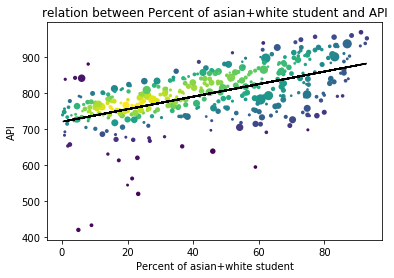

slope:1.7476976896
intercept:720.679173033
r_value:0.580624846117
p_value:2.4570507318e-37
std_err:0.122996058149


In [10]:
#Percent of asian+white student and API
y = ASIANWHITE.iloc[0,:]
x = ASIANWHITE.iloc[1,:]
size=np.mean(data.iloc[:,208:220],axis=1)
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=size/10, edgecolor='')
plt.title('relation between Percent of asian+white student and API')
plt.xlabel('Percent of asian+white student')
plt.ylabel('API')
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)
plt.plot( x, fit_fn(x), '--k')
plt.show()
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
print('slope:{}\nintercept:{}\nr_value:{}\np_value:{}\nstd_err:{}'.format(slope, intercept, r_value, p_value, std_err))

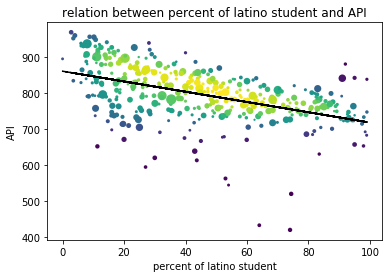

slope:-1.43124067511
intercept:861.563378952
r_value:-0.489406676038
p_value:2.0195954085e-25
std_err:0.127994627743


In [11]:
#percent of latino and api
y = ASWHLA.iloc[0,:]
x = ASWHLA.iloc[1,:]
size=np.mean(data.iloc[:,208:220],axis=1)
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=size/10, edgecolor='')
plt.title('relation between percent of latino student and API')
plt.xlabel('percent of latino student')
plt.ylabel('API')
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)
plt.plot( x, fit_fn(x), '--k')
plt.show()
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
print('slope:{}\nintercept:{}\nr_value:{}\np_value:{}\nstd_err:{}'.format(slope, intercept, r_value, p_value, std_err))

### API v.s Class Size

Then we want to know whether class size will affect API, since, intuitively, smaller class will make teachers have better understanding of each students, which might contribute to student academic success. However, the answer we got can't approve this idea. Because most of class will have class size close to 27, which means we don't have enough information about more extreme class size to analysis the relation between those two. 

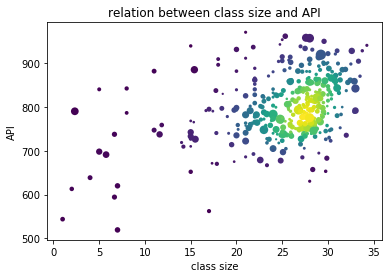

In [12]:
CLASS=pd.DataFrame([data['API13'],data['ACS_46']]).dropna(axis=1)
#class size and api
y = CLASS.iloc[0,:]
x = CLASS.iloc[1,:]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
size=np.mean(data.iloc[:,208:220],axis=1)
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=size/10, edgecolor='')
plt.title('relation between class size and API')
plt.xlabel('class size')
plt.ylabel('API')
plt.show()

### API v.s Parent Education Level

Quite likely, parents education level might have strong correlation with API, since the parents  who have earn academic success before might have higer intelligence or know the right way to pursuit education improvement. After that, their children will learn the right method from them and inherit their talent. Luckily, the answer we got approve this hypothesis. When compare the average parents education level and API for each public school in California, there seems exist a strong positive correlation.

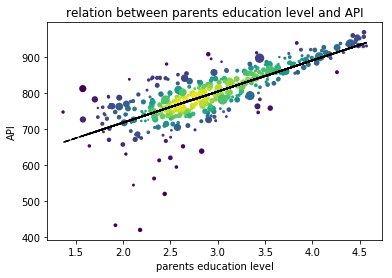

slope:86.749800026
intercept:544.629585209
r_value:0.754303403959
p_value:1.48907964053e-74
std_err:3.78947533135


In [13]:
EDU=pd.DataFrame([data['API13'],data['AVG_ED']]).dropna(axis=1)
#parents education level and api
y = EDU.iloc[0,:]
x = EDU.iloc[1,:]
size=np.mean(data.iloc[:,208:220],axis=1)
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=size/10, edgecolor='')
plt.title('relation between parents education level and API')
plt.xlabel('parents education level')
plt.ylabel('API')
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)
plt.plot( x, fit_fn(x), '--k')
plt.show()
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
print('slope:{}\nintercept:{}\nr_value:{}\np_value:{}\nstd_err:{}'.format(slope, intercept, r_value, p_value, std_err))

### Barplot of Home Prices

To obtain a general idea about California home price, let's draw a bar plot and look at it!

Firstly, we re-organized the data to generate an appropriate data frame(api_homeprice) containing city, API, and home price in 2013, for convenience.

In [14]:
data1=pd.merge(price,school,left_on='City',right_on='DNAME',how='inner')
data0=data1.groupby('City').mean()

In [15]:
y=np.mean(data0.iloc[:,208:220],axis=1)
APIPRICE=pd.DataFrame([data0['API13'],y]).dropna(axis=1)
api_price = APIPRICE.T

In [16]:
city_name = pd.DataFrame(list(api_price.index))
API = pd.DataFrame(list(api_price.iloc[:,0]))
House_price13 = pd.DataFrame(list(api_price.iloc[:,1]))

In [17]:
api_homeprice = pd.concat([city_name, API,House_price13], axis=1)
api_homeprice.columns = ['city_name', 'API','House_price13']

In [18]:
import plotly 
plotly.tools.set_credentials_file(username='', api_key='') ## Need own username and api key

To mark the exact geological location of cities on map, we utilize the shapefile (obtained from website: http://basemaptutorial.readthedocs.io/en/latest/shapefile.html) to gain longitude and latitude of each California city.

In [19]:
# Start
import geopandas as gpd
ca = gpd.read_file("/Users/chenjingqi/Dropbox/College/2017 Winter/STA 141B/Jupyter/Project/Map_shapefile/citiesx010g_shp_nt00962/citiesx010g.shp")

In [20]:
# Merge api_homeprice with cities' lat and lon
ca0 = ca[ca['STATE']=="CA"]
compreh_geo = pd.merge(ca0,api_homeprice,left_on='NAME',right_on='city_name',how='inner')
lat = pd.DataFrame(list(compreh_geo['LATITUDE']))
lon = pd.DataFrame(list(compreh_geo['LONGITUDE']))
prep_data = pd.concat([api_homeprice, lat,lon], axis=1)
prep_data.columns = ['city_name', 'API','House_price13','lat','lon']

In [21]:
prep_data = prep_data[np.isfinite(prep_data['lat'])] # drop rows where contains NA in lat or lon

In [22]:
# Rank by API
prep_data = prep_data.sort_values(by=['API'])

In [23]:
# Rank by Home Price
prep_data_rankbyhome = prep_data.sort_values(by=['House_price13'])

In [24]:
import plotly.plotly as py
from plotly.graph_objs import *

%matplotlib inline

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 12)

bar_data = [Bar(x=prep_data_rankbyhome.city_name,
            y=prep_data_rankbyhome.House_price13)]

py.iplot(bar_data, validate=False, filename='lala')

From the graph we can tell that the gap between home prices are huge. (Interact with the plot to see the home price in ANY city!)

### Interative Map: API score v.s Home Price

In order to have a general idea about the geological distribution of public schools with different academic performance ratings and homes with distinctive price levels, we draw a map to visualize the relationship between two factors. 

In [25]:
import plotly 
plotly.tools.set_credentials_file(username='', api_key='')

In [26]:
# Reference: http://basemaptutorial.readthedocs.io/en/latest/shapefile.html
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 12)

For better visualization outcome, we divide the average public schools' API scores in each city into five categories: Worst(approx. lowest 12.5%), Poor (approx. 12.5%), Medium (approx. 25%), Good (approx. 25%), Excellent(approx. 25%). In addition, they are marked by different colors. On the plot, home price is represented by the size of dots. Larger dots imply higher medium home price per square foot. 

In [27]:
# Read the plot
# size of the dots: house price. Bigger, more expensive
# color of the dots: API. 5b levels corresponding to colorscale

In [28]:
import plotly.plotly as py
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
#df.head()

prep_data['text'] = prep_data['city_name'] + '<br> Avg.Home Price ' + '$'+(prep_data['House_price13']).astype(str) + '/sqrft'+'<br> School Rating: '+(prep_data['API']).astype(str)
limits = [(0,50),(51,100),(101,200),(201,300),(301,383)]
colors = ["light yellow","rgb(8,18,28)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
#colors = ~carat
cities = []
scale = 5000
name0 = ["Worst","Poor","Medium","Good","Excellent"]

for i in range(len(limits)):
    lim = limits[i]
    df_sub = prep_data.iloc[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'ISO-3',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['House_price13']/10,
        
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        #name = '{0} - {1}'.format(lim[0],lim[1]) )
        name = name0[i])
    cities.append(city)

layout = dict(
        title = '2013 California Public School Rating v.s Home Price<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa'),
            resolution = 50,
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            lonaxis = dict( range= [ -135.0, -115.0 ] ),
            lataxis = dict( range= [ 20.0, 45.0 ] ),
            
        ),
    )

fig = dict( data=cities, layout=layout )
py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )

Note: This is an interactive plot. You can see detailed information about API and home price for each city in our dataset. Play with it! =)

###### Interpretation:

If we take a close look at one category each time (turn off/on category by clicking the legend on the map), some interesting patterns can be observed. Schools in the worst category are centered around L.A. If comparing it with the “Poor” category schools, we can see that dots become bigger in Poor, which implies the increase in home price.
In Poor and Medium categories (only click on Poor and Medium cagtegories), the pattern of change in home price is not obvious, but schools of these two kinds are evenly located in Southern and Northern California, instead of being clustered around L.A. 
When comparing “Good” schools and “Excellent” schools(only click on Good and Excellent cagtegories), the dots become much more larger, which means the price of home increased gradually as the public school ratings increase. 
If we directly compare “Worst” to “Excellent”, the contrast in dot size (or say, home price) is much sharper. As the increase of schools’ rating, the home price increases gradually. Thus, we can say that there is positive correlation between home price and school rating.

Not surprisingly, excellent schools are centered around SF and LA. However, the overall public school quality in Northern California is more averaged and better than that in Sourthern California. 

## VI. Crime and House Price

Next, we want to examine that if there is any relationship between crime and house price.  
We first do some data selection for this purpose.

In [37]:
_2013 = price.columns[208:220]
casqft = price[price['State']=='CA']
price13 = casqft[_2013]
price13.loc[:,'Mean Price'] = price13.mean(1)
price13.loc[:,'City'] = casqft['City']
price13=price13.groupby('City').mean()

In [30]:
crime_price = pd.DataFrame({'City': list(price13.index), 'Mean Price': list(price13['Mean Price'])})

In [31]:
crime = pd.read_excel("table_8_offenses_known_to_law_enforcement_california_by_city_2013.xls")
crime.columns=['City', 'Population', 'Violent',
       'Murder','Rape1', 'Rape',
       'Robbery', 'Aggravated assault', 'Property crime', 'Burglary',
       'Larceny theft', 'Motor vehicle theft', 'Arson']
crime_name=['Murder', 'Rape','Robbery', 'Aggravated assault', 'Property crime',
            'Burglary','Larceny theft', 'Motor vehicle theft', 'Arson']
#crime[crime_name] = crime[crime_name].astype(int)
weights=[70.42,10.47,5.83,4.05,1.87,1.39,.37,.37,.16]
weighted_list=[]
not_weighted=[]
for name,weight in zip(crime_name,weights):
    weighted_list.append(crime[name].values*weight)
    not_weighted.append(crime[name].values)
weighted_crime=np.sum(weighted_list,axis=0)
not_weighted_crime=np.sum(not_weighted,axis=0)
crime['weighted_crime']=weighted_crime
crime['not_weighted_crime']=not_weighted_crime

In [32]:
total_data_crime=pd.merge(crime_price,crime,left_on='City',right_on='City',how='inner')

In [33]:
total_data_crime = total_data_crime.sort_values(by=['Mean Price'])

### Scatter plot of crime occurrence and house price

In [34]:
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Scatter(
    x = total_data_crime['Violent'],
    y = total_data_crime['Mean Price'],
    mode='markers',
    name='Violent',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        symbol='circle',
        size=5,
    ),
    text= total_data_crime['City']
)
trace2 = go.Scatter(
    x = total_data_crime['Murder'],
    y = total_data_crime['Mean Price'],
    mode='markers',
    name='Murder',
    marker=dict(
        #color='rgba(204, 204, 204, 0.95)',
        symbol='circle',
        size=5,
    ),
    text= total_data_crime['City']
)
trace3 = go.Scatter(
    x = total_data_crime['Rape'],
    y = total_data_crime['Mean Price'],
    mode='markers',
    name='Rape',
    marker=dict(
        #color='rgba(156, 165, 196, 0.95)',
        symbol='circle',
        size=5,
    ),
    text= total_data_crime['City']
)
trace4 = go.Scatter(
    x = total_data_crime['Robbery'],
    y = total_data_crime['Mean Price'],
    mode='markers',
    name='Robbery',
    marker=dict(
        #color='rgba(156, 165, 196, 0.95)',
        symbol='circle',
        size=5,
    ),
    text= total_data_crime['City']
)
trace5 = go.Scatter(
    x = total_data_crime['Aggravated assault'],
    y = total_data_crime['Mean Price'],
    mode='markers',
    name='Aggravated assault',
    marker=dict(
        #color='rgba(156, 165, 196, 0.95)',
        symbol='circle',
        size=5,
    ),
    text= total_data_crime['City']
)
trace6 = go.Scatter(
    x = total_data_crime['Property crime'],
    y = total_data_crime['Mean Price'],
    mode='markers',
    name='Property crime',
    marker=dict(
        #color='rgba(156, 165, 196, 0.95)',
        symbol='circle',
        size=5,
    ),
    text= total_data_crime['City']
)
trace7 = go.Scatter(
    x = total_data_crime['Burglary'],
    y = total_data_crime['Mean Price'],
    mode='markers',
    name='Burglary',
    marker=dict(
        #color='rgba(156, 165, 196, 0.95)',
        symbol='circle',
        size=5,
    ),
    text= total_data_crime['City']
)
trace8 = go.Scatter(
    x = total_data_crime['Larceny theft'],
    y = total_data_crime['Mean Price'],
    mode='markers',
    name='Larceny theft',
    marker=dict(
        #color='rgba(156, 165, 196, 0.95)',
        symbol='circle',
        size=5,
    ),
    text= total_data_crime['City']
)
trace9 = go.Scatter(
    x = total_data_crime['Motor vehicle theft'],
    y = total_data_crime['Mean Price'],
    mode='markers',
    name='Motor vehicle theft',
    marker=dict(
        #color='rgba(156, 165, 196, 0.95)',
        symbol='circle',
        size=5,
    ),
    text= total_data_crime['City']
)
trace10 = go.Scatter(
    x = total_data_crime['Arson'],
    y = total_data_crime['Mean Price'],
    mode='markers',
    name='Arson',
    marker=dict(
        #color='rgba(156, 165, 196, 0.95)',
        symbol='circle',
        size=5,
    ),
    text= total_data_crime['City']
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10]

layout = go.Layout(
    title="Occurrence of different crime type vs Median Price",
    yaxis=dict(
        title='Median House Price'
    ),
    xaxis=dict(
        title='Frequency of Crime'
    ),
    
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='crimemedianprice')

In order to have a first impression about the relationship between crime and house price, we plot the scatter plot of different crime types occurrences vs house price. From the plot, we can see there are some outliers. Therefore, we might need to figure out those outliers and exclued those in our analysis.  
  
From the plot, there is no direct linear relationship between each crime occurrence and house price. Therefore, we want to see if there is any trend in crime occurrence and house price. We'll plot a stacked bar plot and the house price in the same plot to figure it out. 

### Barplot of crime and house price

In [35]:
import plotly 
plotly.tools.set_credentials_file(username='', api_key='') ## Need own username and api key

In [36]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=total_data_crime['City'],
    y=total_data_crime['Violent'],
    name='Violent',
    yaxis = 'y1',
    marker=dict(color='rgb(158,202,225)')
)
trace2 = go.Bar(
    x=total_data_crime['City'],
    y=total_data_crime['Murder'],
    name='Murder',
    yaxis = 'y1'
)

trace3 = go.Bar(
    x=total_data_crime['City'],
    y=total_data_crime['Rape'],
    name='Rape',
    yaxis = 'y1'
)

trace4 = go.Bar(
    x=total_data_crime['City'],
    y=total_data_crime['Robbery'],
    name='Robbery',
    yaxis = 'y1'
)

trace5 = go.Bar(
    x=total_data_crime['City'],
    y=total_data_crime['Aggravated assault'],
    name='Aggravated assault',
    yaxis = 'y1'
)

trace6 = go.Bar(
    x=total_data_crime['City'],
    y=total_data_crime['Property crime'],
    name='Property crime',
    yaxis = 'y1'
)

trace7 = go.Bar(
    x=total_data_crime['City'],
    y=total_data_crime['Burglary'],
    name='Burglary',
    yaxis = 'y1'
)

trace8 = go.Bar(
    x=total_data_crime['City'],
    y=total_data_crime['Larceny theft'],
    name='Larceny theft',
    yaxis = 'y1'
)

trace9 = go.Bar(
    x=total_data_crime['City'],
    y=total_data_crime['Motor vehicle theft'],
    name='Motor vehicle theft',
    yaxis = 'y1'
)

trace10 = go.Bar(
    x=total_data_crime['City'],
    y=total_data_crime['Arson'],
    name='Arson',
    yaxis = 'y1'
)

trace11 = go.Scatter(
    x = total_data_crime['City'],
    y = total_data_crime['Mean Price'],
    name='House Median Price',
    yaxis='y2'
)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11]

layout = go.Layout(
    barmode='stack',
    legend=dict(
        x=0.01,
        y=1
    ),
    yaxis1=dict(
        title='Crime',
        titlefont=dict(
            color='#ff7f0e'
        ),
        tickfont=dict(
            color='#ff7f0e'
        )
    ),
    yaxis2=dict(
        title='House Median Price',
        titlefont=dict(
            color='#1f77b4'
        ),
        tickfont=dict(
            color='#1f77b4'
        ),
        anchor='x',
        overlaying='y',
        side='right',
        position=0.75
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')
#py.image.save_as(fig, 'totalcrimeandhouseprice.png')

###### Interpretation:
In the plot, the blue curve is the house price and the y axis for house price is on the right.  
  
There is also stacked bar plot in the graph indicating the occurrences of each crime type. From the stacked bar plot, we can see Los Angeles has the most occurences of crime, while San Francisco is the next. 
  
When exclude those super metropolis in the graph, we can divide the graph into three parts (when we drag the part in the graph to zoom in):  
1. The first part is the rightmost part of the cities in the plot. Those cities have higher house price and lower occurrences of crime.  
2. The second part is the cities in the middle of the plot. The house price of those cities are in the middle and the crime occurrences of those cities are also in the middle.  
3. The third part is the leftmost cities of the plot. They have lowest house price and relatively higher crime occurrences compared to other parts in the plot.  

Therefore, we may be able to conclude that there is a negative relationship between crime occurrence and house price in California. 

## VII. NLTK (Sentiment Analysis) News vs house price

In this section, we want to know the affect house price on news. We frist extract some housing news headlines and their release time from Cnbc . We then process each of the headlind we extract in order to find each sentiment score, 0 is negative and 1 is positive. Next, We find the mean of sentiment score of each month then merege them the price/feet of each month.

In [6]:
import nltk
import pandas as pd
import unicodedata
from lxml import html
import requests
import numpy as np
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
import requests_cache
from os import path
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from KaggleWord2VecUtility import KaggleWord2VecUtility
from urllib2 import Request, urlopen
from urlparse import urlparse, urlunparse
import json
from urllib2 import Request, urlopen
import urllib2
import re
from bs4 import BeautifulSoup
requests_cache.install_cache('coll_cache')

/Users/kawoontam/anaconda/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Web scraping:
We use the following code to extract the headlines from the cnbc.com/housing.

In [7]:
# web scraping
# Find all the titles and dates on each page.
titles=[]
times =[]
opener = urllib2.build_opener()
for i in range(1,54):
    url = 'http://www.cnbc.com/housing/?page='+str(i)
    soup = BeautifulSoup(opener.open(url), "lxml")
    time = soup.find_all('time')
    times = times + ['-'.join(str(i).split()[2:4]) for i in time][4:]
    titles =titles + [' '.join(title.get_text().split()) for title in soup.find_all('div', {'class' : 'headline'})][4:]

In [8]:
# save data to data frame then output to an excel
whole = pd.DataFrame({'titles':titles,'times':times})
whole = whole.T
writer = pd.ExcelWriter('output.xlsx')
whole.to_excel(writer,'Sheet1')
writer.save()

In [9]:
price = pd.read_csv("City_MedianValuePerSqft_AllHomes.csv")

Here we decided to built our own setiment analysis model since the build-in sentiment tool in NLTK is not so accurate.

In [25]:
# We read output.xlsx, which we add 100 correct data.
new1 = pd.read_excel("output.xlsx")
train = new1.dropna()
test = new1[new1['po-neg'].isnull()]

In [26]:
# building training set
train.titles = train.titles.apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii','ignore'))
train = train.reset_index(drop=True)
train['po-neg'] = train['po-neg'].astype(dtype = np.int64)

/Users/kawoontam/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [27]:
# building testing set
test.titles = test.titles.apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii','ignore'))
test = test.reset_index(drop = True)

In [28]:
# denoise the training data
clean_train_reviews = []
print "Cleaning and parsing the training set news heading...\n"
for i in xrange(0, len(train["titles"])):
    clean_train_reviews.append(" ".join(KaggleWord2VecUtility.review_to_wordlist(train["titles"][i],True)))

Cleaning and parsing the training set news heading...



/Users/kawoontam/anaconda/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/kawoontam/anaconda/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


### Tokenize 

In [29]:
# tokenize the tarining data set
print "Creating the bag of words...\n"
vectorizer = CountVectorizer(analyzer = "word",   \
                            tokenizer = None,    \
                            preprocessor = None, \
                            stop_words = None,   \
                            max_features = 4000)

Creating the bag of words...



In [30]:
train_data_features = vectorizer.fit_transform(clean_train_reviews)
train_data_features = train_data_features.toarray()
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit( train_data_features, train["po-neg"])

In [31]:
# denoise the testing data set
clean_test_reviews = []
print "Cleaning and parsing the test set headline...\n"
for i in xrange(0,len(test["titles"])):
    clean_test_reviews.append(" ".join(KaggleWord2VecUtility.review_to_wordlist(test["titles"][i], True)))

Cleaning and parsing the test set headline...



In [32]:
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray() 

In [33]:
# create a classifer
# predict the result of testing set by the classifer
# save result to a data frame.
print "Predicting test label...\n"
result = forest.predict(test_data_features)
output = pd.DataFrame( data={"titles":test["titles"], "po-neg":result} )

Predicting test label...



In [34]:
previous_value = list(train['po-neg'].values)
previous_value = previous_value+list(output['po-neg'].values)
new1['po-neg']= previous_value

In [35]:
new1.titles = new1.titles.apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii','ignore'))
new1.to_csv("sentiment_result.csv")
means = new1.groupby("times").mean()
means.to_csv("mean.csv")

The following data frame shows the mean of sentiment score of each month. The setiment status is positive if the sentiment score it above 0.5, otherwise.

In [43]:
mean=pd.read_csv("mean.csv")
mean

,Unnamed: 0,times,po-neg
0,0,2014-06,1.000000
1,1,2014-11,1.000000
2,2,2015-03,1.000000
3,3,2015-05,1.000000
4,4,2015-10,1.000000
5,5,2015-12,1.000000
6,6,2016-01,0.847826
7,7,2016-02,0.910714
8,8,2016-03,0.912500
9,9,2016-04,0.886076


In [45]:
price_web = price.dropna()
average_price = pd.DataFrame(np.mean(price_web))
sentiment_month = pd.merge(average_price,mean,left_index=True,right_on='times',how='inner')
sentiment_month


,0,Unnamed: 0,times,po-neg
0,132.906508,0,2014-06,1.000000
1,135.155751,1,2014-11,1.000000
2,137.200564,2,2015-03,1.000000
3,138.489293,3,2015-05,1.000000
4,141.643476,4,2015-10,1.000000
5,142.790557,5,2015-12,1.000000
6,143.340332,6,2016-01,0.847826
7,143.953097,7,2016-02,0.910714
8,144.603573,8,2016-03,0.912500
9,145.207772,9,2016-04,0.886076


In [46]:
positive_negtive = sentiment_month['po-neg'].values
avg_price = sentiment_month.iloc[:,0].values
sum = 0
for i in range(len(positive_negtive)-1):
    if positive_negtive[i] > 0.5 and avg_price[i+1]>avg_price[i]:
        sum += 1
    elif positive_negtive[i] < 0.5 and avg_price[i+1]<avg_price[i]:
        sum += 1
print 'accuracy of sentiment model is ',sum/(len(positive_negtive)-1)*100 

accuracy of sentiment model is  100


###### Interpretation

We can see that our sentiment model is 100% accuracy. However, we do not know if our model is accuracy or not because house price have been increasing over the last few year. And as our model only shows positive setiment score from 2014 to 2017. We hope to get more news headline around 2006 to 2008 as testing set to test our model. Anyway, we can see that the news is affecting the house price in this case. It would be nice that if we can extract news according to city. This would give us more insight information on how the news affect the housing price in each city.

## VIII. Conclusion

There are some interesting facts about Academic Performance Index as shown in the fifth part of the project. Moreover, after examining the relationship between API and house price, we find that there is a patter showing that in the cities with higher school ranking, the house price is also higher.  
  
From the result of the crime and house price, the less the crime occurs, the higher the house price will be.  
Therefore, when people decide where to buy a house, school ranking and crime situation are two factors that may need to be considered into price.  
  
Furthermore, the information from the news can also provide directive prediction for the house price, even though house price has been increasing for the past few years.